In [1]:
import numpy as np

IMAGE_DATA_FILE = "../data/caltech-256_features.npz"

image_data = np.load(IMAGE_DATA_FILE)
print(list(image_data.keys()))


['file_names', 'vit_features', 'clip_features', 'labels']


In [2]:
X_vit = image_data.get("vit_features")
print(f"The shape of X_vit is {X_vit.shape}")

X_clip = image_data.get("clip_features")
print(f"The shape of X_clip is {X_clip.shape}")

y = image_data.get("labels")
print(f"The shape of y is {y.shape}")


The shape of X_vit is (30607, 768)
The shape of X_clip is (30607, 768)
The shape of y is (30607,)


In [ ]:
X_vit_L2_norm = np.linalg.norm(X_vit, 2, axis=1)
print(f"mean: {np.mean(X_vit_L2_norm)}")
print(f"var: {np.var(X_vit_L2_norm)}")
print(f"std: {np.std(X_vit_L2_norm)}")


In [ ]:
X_vit_scaled = X_vit / np.mean(X_vit_L2_norm)
X_vit_scaled_L2_norm = np.linalg.norm(X_vit_scaled, 2, axis=1)
print(f"mean: {np.mean(X_vit_scaled_L2_norm)}")
print(f"var: {np.var(X_vit_scaled_L2_norm)}")
print(f"std: {np.std(X_vit_scaled_L2_norm)}")
print(f"min: {np.min(X_vit_scaled_L2_norm)}")
print(f"max: {np.max(X_vit_scaled_L2_norm)}")


In [ ]:
X_clip_L2_norm = np.linalg.norm(X_clip, 2, axis=1)
print(f"mean: {np.mean(X_clip_L2_norm)}")
print(f"var: {np.var(X_clip_L2_norm)}")
print(f"std: {np.std(X_clip_L2_norm)}")


In [ ]:
X_clip_scaled = X_clip / np.mean(X_clip_L2_norm)
X_clip_scaled_L2_norm = np.linalg.norm(X_clip_scaled, 2, axis=1)
print(f"mean: {np.mean(X_clip_scaled_L2_norm)}")
print(f"var: {np.var(X_clip_scaled_L2_norm)}")
print(f"std: {np.std(X_clip_scaled_L2_norm)}")
print(f"min: {np.min(X_clip_scaled_L2_norm)}")
print(f"max: {np.max(X_clip_scaled_L2_norm)}")


In [3]:
labels = np.unique(y)

X_vit_class_mean = [np.mean(X_vit[np.where(y == label)], axis=0) for label in labels]
X_vit_class_mean_scaled = X_vit_class_mean / np.mean(np.linalg.norm(X_vit_class_mean, 2, axis=1))
X_vit_class_mean_scaled_L2_norm = np.linalg.norm(X_vit_class_mean_scaled, 2, axis=1)
print(f"mean: {np.mean(X_vit_class_mean_scaled_L2_norm)}")
print(f"var: {np.var(X_vit_class_mean_scaled_L2_norm)}")
print(f"std: {np.std(X_vit_class_mean_scaled_L2_norm)}")
print(f"min: {np.min(X_vit_class_mean_scaled_L2_norm)}")
print(f"max: {np.max(X_vit_class_mean_scaled_L2_norm)}")

# X_vit_scaled_class_mean = [np.mean(X_vit_scaled[np.where(y == label)], axis=0) for label in labels]
# X_vit_scaled_class_mean_L2_norm = np.linalg.norm(X_vit_scaled_class_mean, 2, axis=1)
# print(f"mean: {np.mean(X_vit_scaled_class_mean_L2_norm)}")
# print(f"var: {np.var(X_vit_scaled_class_mean_L2_norm)}")
# print(f"std: {np.std(X_vit_scaled_class_mean_L2_norm)}")
# print(f"min: {np.min(X_vit_scaled_class_mean_L2_norm)}")
# print(f"max: {np.max(X_vit_scaled_class_mean_L2_norm)}")


mean: 0.9999997615814209
var: 0.10509216040372849
std: 0.32417920231819153
min: 0.37165313959121704
max: 2.102172374725342


In [4]:
X_clip_class_mean = [np.mean(X_clip[np.where(y == label)], axis=0) for label in labels]
X_clip_class_mean_scaled = X_clip_class_mean / np.mean(np.linalg.norm(X_clip_class_mean, 2, axis=1))
X_clip_class_mean_scaled_L2_norm = np.linalg.norm(X_clip_class_mean_scaled, 2, axis=1)
print(f"mean: {np.mean(X_clip_class_mean_scaled_L2_norm)}")
print(f"var: {np.var(X_clip_class_mean_scaled_L2_norm)}")
print(f"std: {np.std(X_clip_class_mean_scaled_L2_norm)}")
print(f"min: {np.min(X_clip_class_mean_scaled_L2_norm)}")
print(f"max: {np.max(X_clip_class_mean_scaled_L2_norm)}")


# X_clip_scaled_class_mean = [np.mean(X_clip_scaled[np.where(y == label)], axis=0) for label in labels]
# X_clip_scaled_class_mean_L2_norm = np.linalg.norm(X_clip_scaled_class_mean, 2, axis=1)
# print(f"mean: {np.mean(X_clip_scaled_class_mean_L2_norm)}")
# print(f"var: {np.var(X_clip_scaled_class_mean_L2_norm)}")
# print(f"std: {np.std(X_clip_scaled_class_mean_L2_norm)}")
# print(f"min: {np.min(X_clip_scaled_class_mean_L2_norm)}")
# print(f"max: {np.max(X_clip_scaled_class_mean_L2_norm)}")


mean: 1.0000001192092896
var: 0.007388745434582233
std: 0.08595781028270721
min: 0.7420309782028198
max: 1.2271510362625122


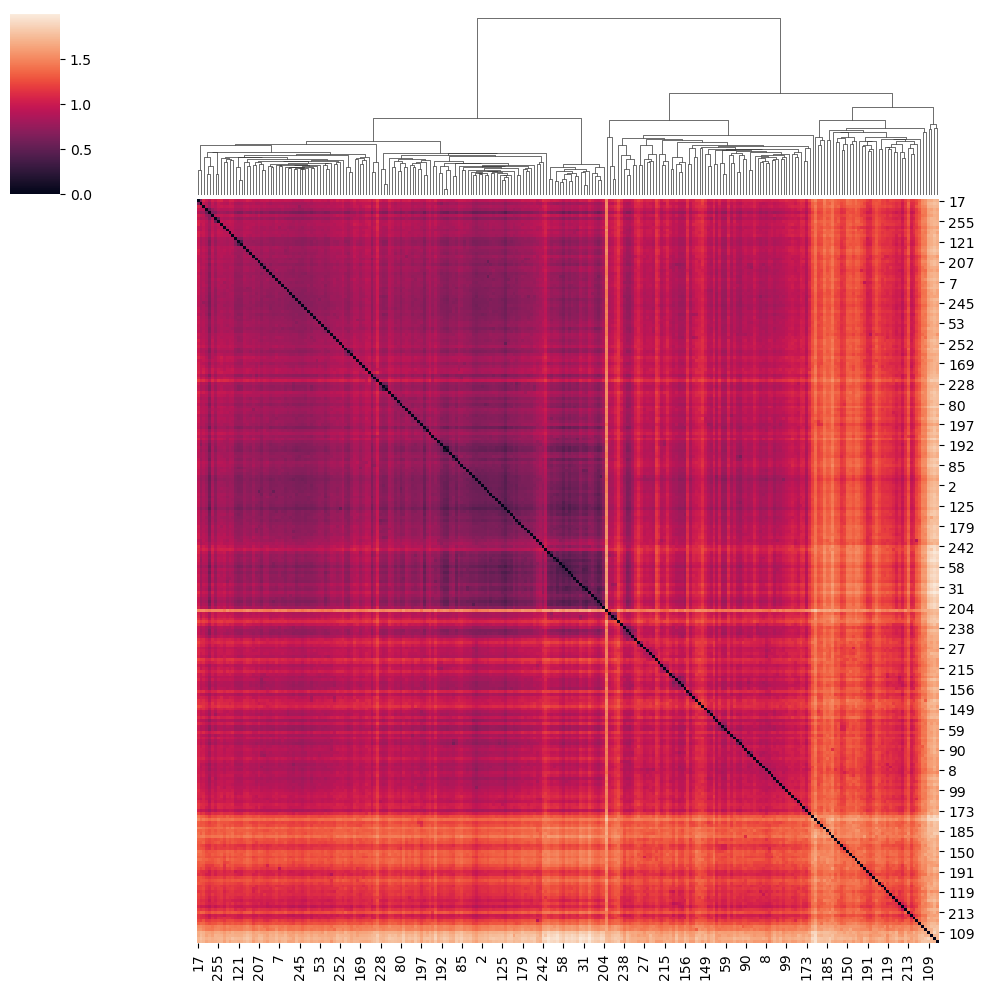

In [32]:
from seaborn import clustermap
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage

# X_vit_class_mean_scaled_dist = pdist(X_vit_class_mean_scaled[:-1], "cosine")
X_vit_class_mean_scaled_dist = pdist(X_vit_class_mean_scaled[:-1], "euclidean")
X_vit_class_mean_scaled_linkage = linkage(X_vit_class_mean_scaled_dist,
                                          method="ward",
                                          optimal_ordering=True)
X_vit_class_mean_scaled_clustermap = clustermap(squareform(X_vit_class_mean_scaled_dist),
                                                row_linkage=X_vit_class_mean_scaled_linkage,
                                                col_linkage=X_vit_class_mean_scaled_linkage)
X_vit_class_mean_scaled_clustermap.ax_row_dendrogram.remove()

# X_vit_class_mean_dist = pdist(X_vit_class_mean[:-1], "cosine")
# X_vit_class_mean_linkage = linkage(X_vit_class_mean_dist,
#                                           method="average",
#                                           metric="cosine",
#                                           optimal_ordering=True)
# X_vit_class_mean_clustermap = clustermap(squareform(X_vit_class_mean_dist),
#                                                 row_linkage=X_vit_class_mean_linkage,
#                                                 col_linkage=X_vit_class_mean_linkage)
# X_vit_class_mean_clustermap.ax_row_dendrogram.remove()


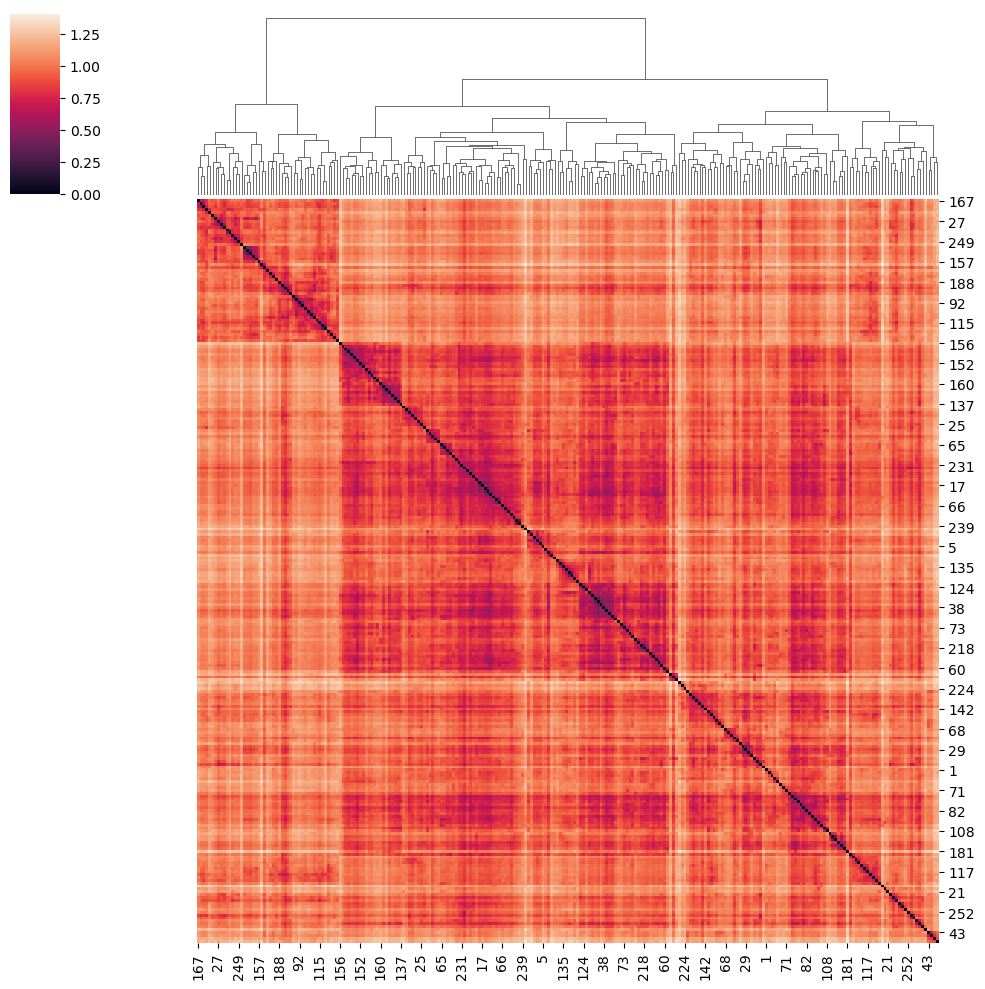

In [33]:
# X_clip_class_mean_scaled_dist = pdist(X_clip_class_mean_scaled[:-1], "cosine")
X_clip_class_mean_scaled_dist = pdist(X_clip_class_mean_scaled[:-1], "euclidean")
X_clip_class_mean_scaled_linkage = linkage(X_clip_class_mean_scaled_dist,
                                          method="ward",
                                          optimal_ordering=True)
X_clip_class_mean_scaled_clustermap = clustermap(squareform(X_clip_class_mean_scaled_dist),
                                                row_linkage=X_clip_class_mean_scaled_linkage,
                                                col_linkage=X_clip_class_mean_scaled_linkage)
X_clip_class_mean_scaled_clustermap.ax_row_dendrogram.remove()